In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# History

In [2]:
def plot_columns(df, columns, ylim=None, logaxis=False):
    # Check if 'Iteration' is a column in the DataFrame
    if 'Iteration' not in df.columns:
        raise ValueError("The DataFrame does not contain an 'Iteration' column.")
    
    # Check if all columns in the list are present in the DataFrame
    for column in columns:
        if column not in df.columns:
            raise ValueError(f"The DataFrame does not contain the column: {column}")
    
    # Plotting each specified column against the 'Iteration' column
    plt.figure(figsize=(20, 6))
    for column in columns:
        plt.plot(df['Iteration'], df[column], label=column)

    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    # Setting the y-axis to a logarithmic scale if specified
    if logaxis:
        plt.yscale('log')

    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.title('Plot of Columns over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
history = 'history/training_history.csv'
history = pd.read_csv(history)

history.head()

,Elapsed Time,Iteration,Total Iterations,D/latent_real,D/latent_fake,D/latent_reg,D/ref_real,D/ref_fake,D/ref_reg,G/latent_adv,...,G/latent_id,G/latent_sty,G/latent_ds,G/ref_adv,G/ref_dom,G/ref_cyc,G/ref_id,G/ref_sty,G/ref_ds,G/lambda_ds
0,0:00:58,100,100000,0.071591,0.061985,0.012407,0.041627,0.202431,0.015585,0.844928,...,0.288890,0.687986,0.716549,1.241666,43.104828,0.279077,0.211158,1.792210,0.016493,0.999
1,0:01:30,200,100000,0.367113,0.022773,0.032718,0.005250,0.495980,0.023850,0.465563,...,0.135907,0.517831,0.662811,1.054665,21.009022,0.152517,0.111644,0.313890,0.008909,0.998
2,0:02:01,300,100000,0.177723,0.012020,0.054601,0.025273,0.205620,0.044646,1.054747,...,0.088672,0.562427,0.598005,0.449155,11.477431,0.087952,0.073681,0.245018,0.004663,0.997
3,0:02:32,400,100000,0.257224,0.008308,0.054644,0.042500,0.241718,0.038521,1.307911,...,0.093997,0.520640,0.630732,0.502709,16.633108,0.093006,0.081268,0.133360,0.002776,0.996
4,0:03:05,500,100000,0.287443,0.018084,0.112278,0.055101,0.402145,0.041719,0.994005,...,0.066688,0.582496,0.464834,0.950988,12.909841,0.061876,0.056244,0.462528,0.004340,0.995


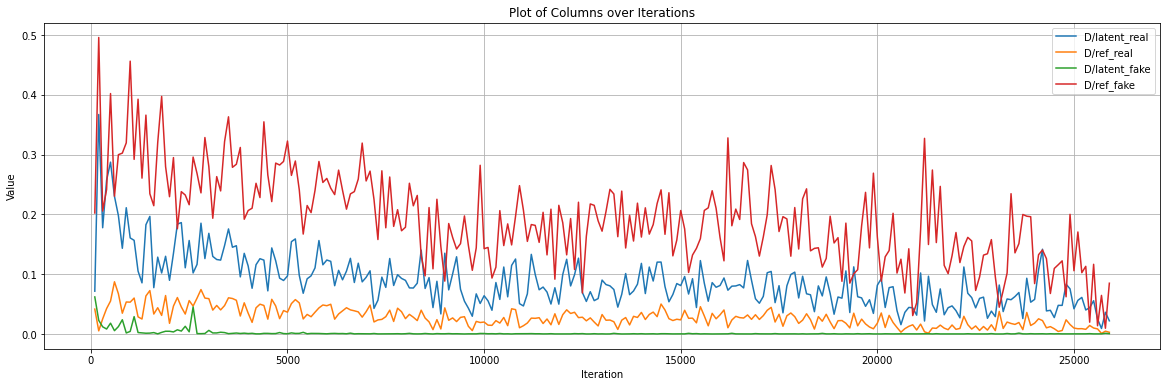

In [4]:
plot_columns(history, ['D/latent_real', 'D/ref_real', 'D/latent_fake', 'D/ref_fake'], logaxis=False)

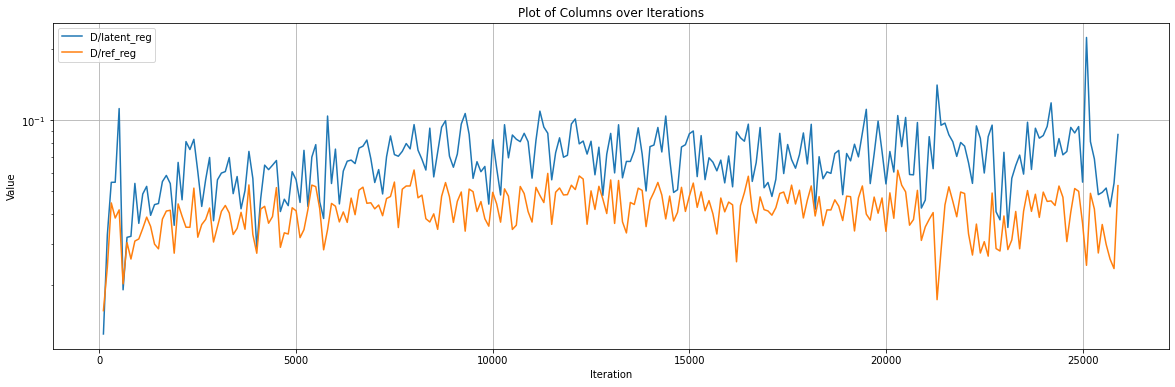

In [5]:
plot_columns(history, ['D/latent_reg', 'D/ref_reg'], logaxis=True)

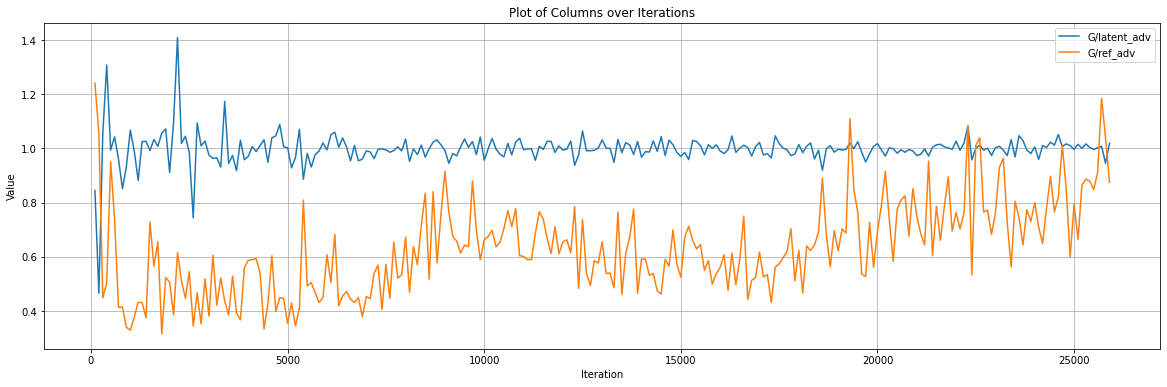

In [7]:
plot_columns(history, ['G/latent_adv', 'G/ref_adv'], logaxis=False)

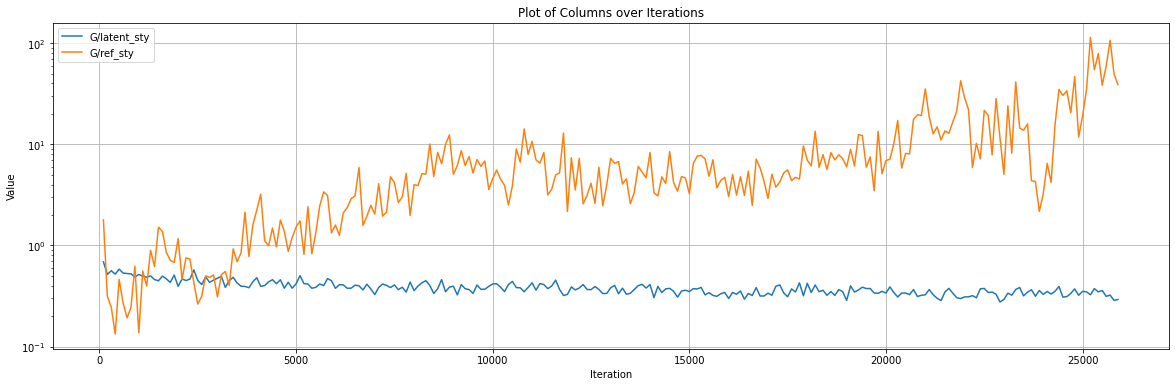

In [8]:
plot_columns(history, ['G/latent_sty', 'G/ref_sty'], logaxis=True)

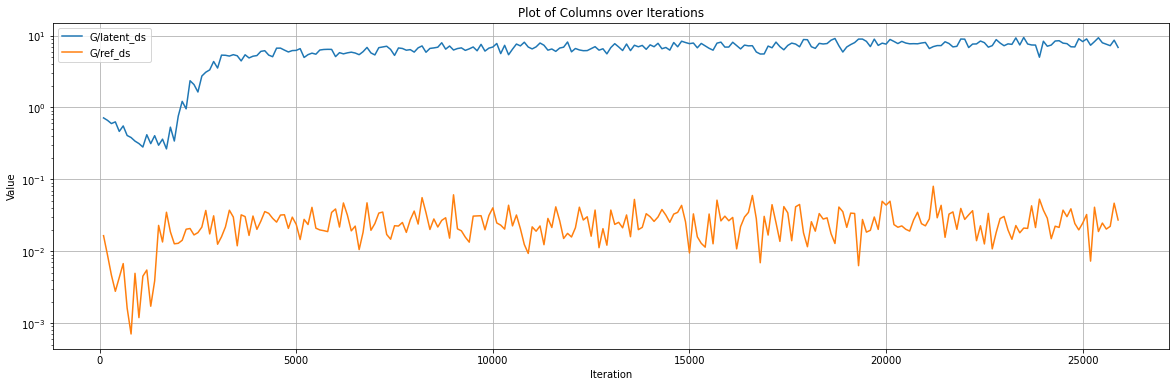

In [9]:
plot_columns(history, ['G/latent_ds', 'G/ref_ds'], logaxis=True)

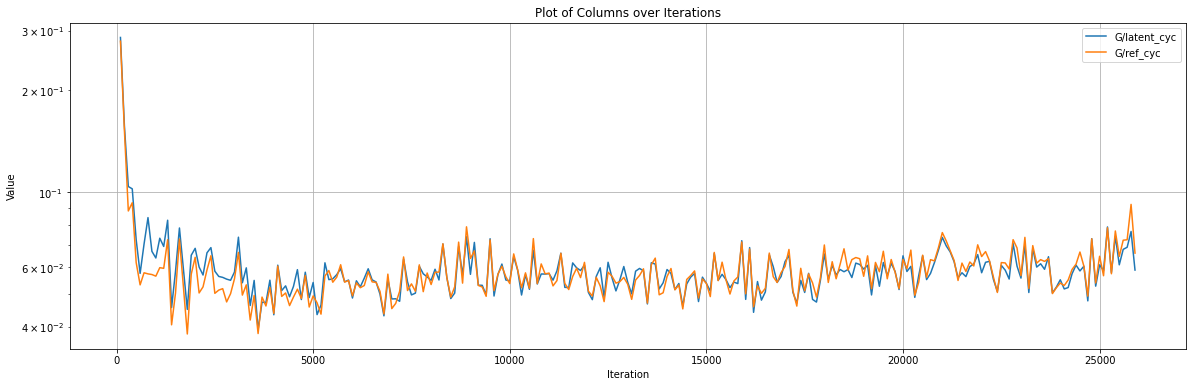

In [10]:
plot_columns(history, ['G/latent_cyc', 'G/ref_cyc'], logaxis=True)

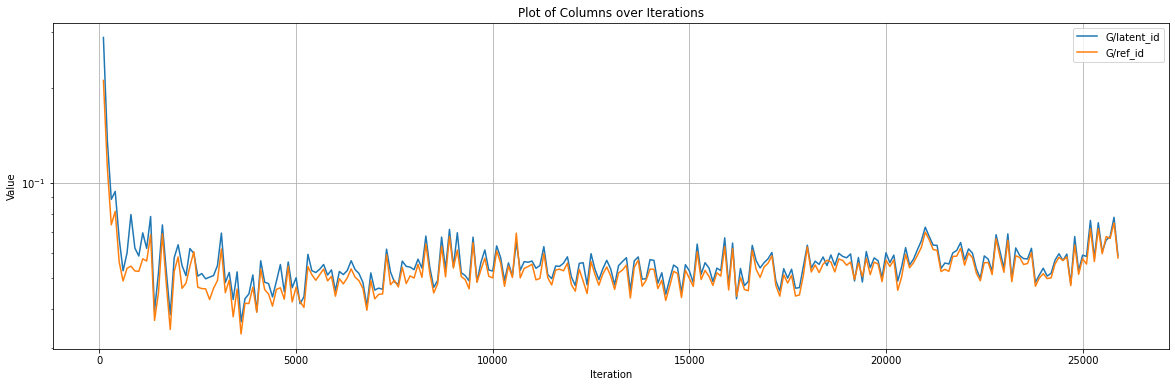

In [11]:
plot_columns(history, ['G/latent_id', 'G/ref_id'], logaxis=True)

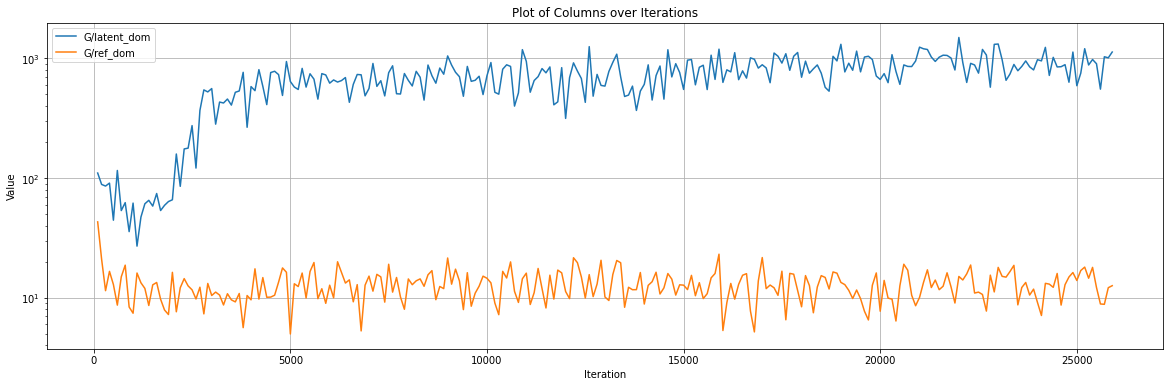

In [15]:
plot_columns(history, ['G/latent_dom', 'G/ref_dom'], logaxis=True)

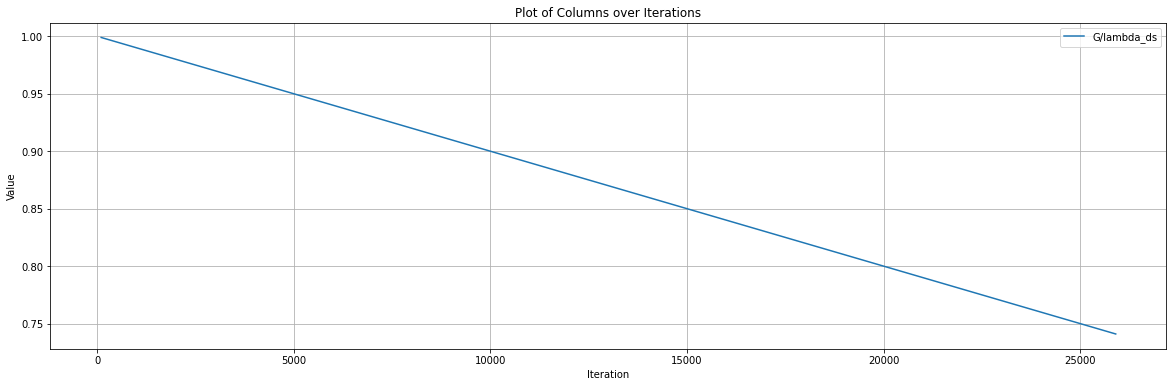

In [16]:
plot_columns(history, ['G/lambda_ds'])

# Metrics

In [18]:
file_path = 'eval/classification_scores.csv'
classification_scores = pd.read_csv(file_path)
classification_scores.head()

,step,mode,source,target,domain,accuracy,loss
0,2000,latent,WAL,CLU,10,0.363636,2.487764
1,2000,latent,WAL,CLU,11,0.354027,2.143743
2,2000,latent,WAL,CLU,12,0.540541,1.796507
3,2000,latent,WAL,CLU,13,0.619760,1.692706
4,2000,latent,WAL,CLU,14,0.308725,3.072773


In [19]:
def plot_average_by_mode_metric(metrics, mode, metric):
    
    # Filter the DataFrame based on the mode and metric
    filtered_data = metrics[(metrics['mode'] == mode) & (metrics['metric'] == metric)]

    # Group by 'step' and 'source', then calculate the mean for each group
    mean_data = filtered_data.groupby(['step', 'source']).agg({'value': 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    for source in mean_data['source'].unique():
        source_data = mean_data[mean_data['source'] == source]
        plt.plot(source_data['step'], source_data['value'], label=source)
        if metric == 'accuracy':
            # Find the maximum value of the metric and its corresponding step
            max_value = source_data['value'].max()
            max_step = source_data[source_data['value'] == max_value]['step'].values[0]
            print(f'Maximum {metric} for {source} in {mode} mode: {max_value:.4f} at step {max_step}')
        elif metric == 'loss':
            # Find the minimum value of the metric and its corresponding step
            min_value = source_data['value'].min()
            min_step = source_data[source_data['value'] == min_value]['step'].values[0]
            print(f'Minimum {metric} for {source} in {mode} mode: {min_value:.4f} at step {min_step}')

    plt.title(f'Average {metric} for {mode} mode')
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.legend(title='Source')
    plt.grid(True)
    plt.show()

for metric in classification_scores['metric'].unique():
    for mode in classification_scores['mode'].unique():
        plot_average_by_mode_metric(classification_scores, mode, metric)

KeyError: 'metric'

Maximum accuracy for CLD: 0.8906 at step 83000
Maximum accuracy for CLU: 0.8869 at step 69000
Maximum accuracy for RUN: 0.8123 at step 46000
Maximum accuracy for WAL: 0.9237 at step 72000


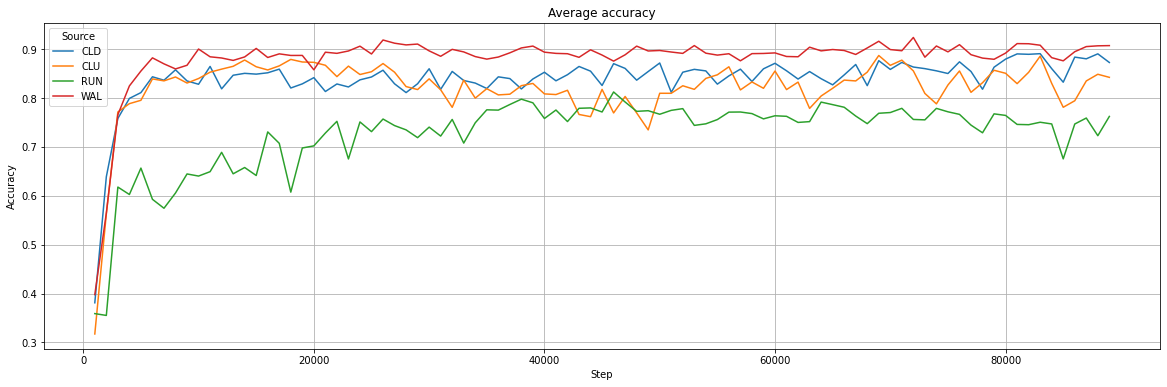

Minimum loss for CLD: 0.5814 at step 25000
Minimum loss for CLU: 0.4569 at step 69000
Minimum loss for RUN: 0.7760 at step 46000
Minimum loss for WAL: 0.4008 at step 72000


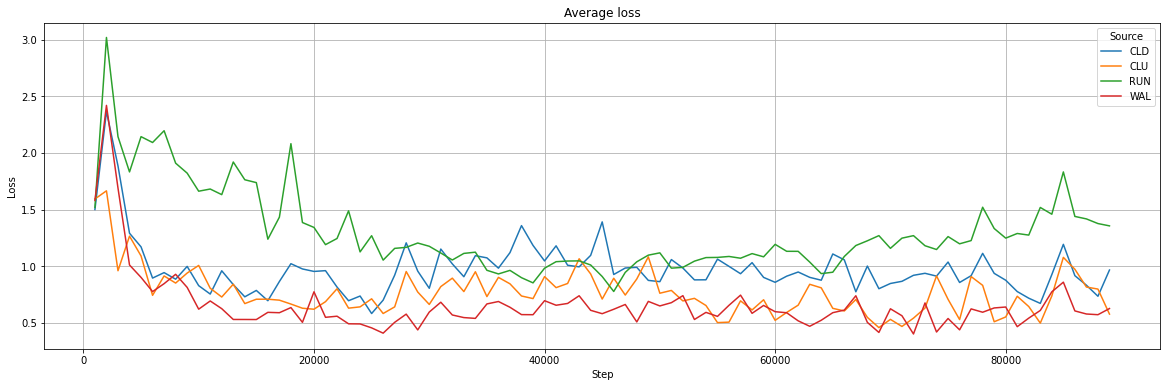

In [15]:
def plot_average_by_activity(metrics, metric):
    
    # Filter the DataFrame based on the mode and metric
    filtered_data = metrics[metrics['metric'] == metric]

    # Group by 'step' and 'source', then calculate the mean for each group
    mean_data = filtered_data.groupby(['step', 'source']).agg({'value': 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    for source in mean_data['source'].unique():
        source_data = mean_data[mean_data['source'] == source]
        plt.plot(source_data['step'], source_data['value'], label=source)
        if metric == 'accuracy':
            # Find the maximum value of the metric and its corresponding step
            max_value = source_data['value'].max()
            max_step = source_data[source_data['value'] == max_value]['step'].values[0]
            print(f'Maximum {metric} for {source}: {max_value:.4f} at step {max_step}')
        elif metric == 'loss':
            # Find the minimum value of the metric and its corresponding step
            min_value = source_data['value'].min()
            min_step = source_data[source_data['value'] == min_value]['step'].values[0]
            print(f'Minimum {metric} for {source}: {min_value:.4f} at step {min_step}')
            # source_data.to_csv(f'{source}_{metric}.csv', index=False)

    plt.title(f'Average {metric}')
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.legend(title='Source')
    plt.grid(True)
    plt.show()

for metric in classification_scores['metric'].unique():
    plot_average_by_activity(classification_scores, metric)

Max in latent mode: 0.8375 at step 79000
Max in reference mode: 0.9071 at step 69000


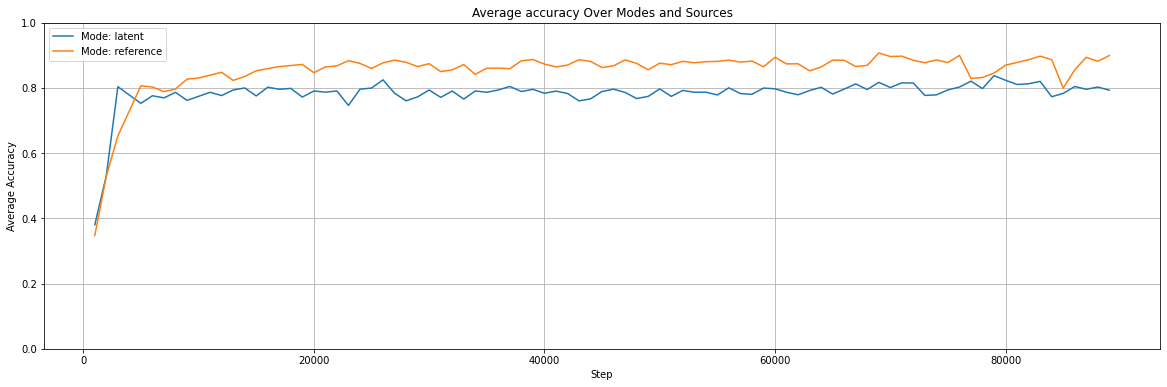

Min in latent mode: 0.8883 at step 26000
Min in reference mode: 0.3554 at step 69000


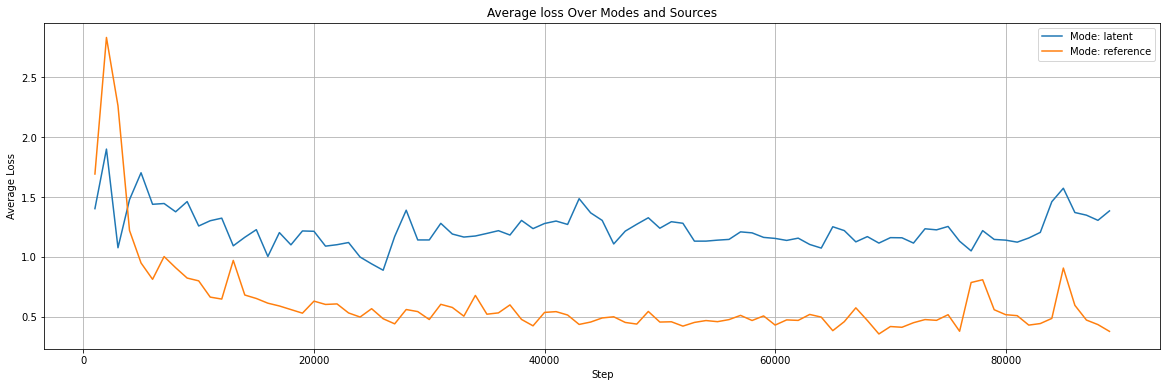

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_metric_over_modes_sources(metrics, metric, ylim=None):
    """
    Plots two lines, each representing the average of values for each mode, averaged over all sources.
    
    Parameters:
        metrics (pd.DataFrame): DataFrame containing the metrics.
        metric (str): The metric to filter by (e.g., 'accuracy' or 'logloss').
    """
    # Filter the DataFrame based on the metric
    filtered_data = metrics[metrics['metric'] == metric]

    # Group by 'step', 'mode' and then calculate the mean across 'source' and 'subject'
    mean_data = filtered_data.groupby(['step', 'mode']).agg({'value': 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    modes = mean_data['mode'].unique()
    for mode in modes:
        mode_data = mean_data[mean_data['mode'] == mode]
        # mode_data.to_csv(f'{mode}_{metric}.csv', index=False)
        plt.plot(mode_data['step'], mode_data['value'], label=f'Mode: {mode}')
        max_value = mode_data['value'].max()
        min_value = mode_data['value'].min()
        if metric == 'accuracy':
            step = mode_data[mode_data['value'] == max_value]['step'].values[0]
            print(f'Max in {mode} mode: {max_value:.4f} at step {step}')
        else:
            step = mode_data[mode_data['value'] == min_value]['step'].values[0]
            print(f'Min in {mode} mode: {min_value:.4f} at step {step}')
    
    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    plt.title(f'Average {metric} Over Modes and Sources')
    plt.xlabel('Step')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_average_metric_over_modes_sources(classification_scores, 'accuracy', ylim=(0, 1))
plot_average_metric_over_modes_sources(classification_scores, 'loss')

In [17]:
identification = pd.read_csv('eval/identification_scores.csv')
identification.head()

,step,mode,source,target,accuracy,loss
0,1000,latent,WAL,RUN,0.194922,6.997514
1,1000,latent,WAL,CLD,0.212121,7.108152
2,1000,latent,WAL,CLU,0.190008,7.095166
3,1000,latent,RUN,WAL,0.167724,7.421743
4,1000,latent,RUN,CLD,0.184044,7.237375


Maximum accuracy in latent mode: 0.4573 at step 81000


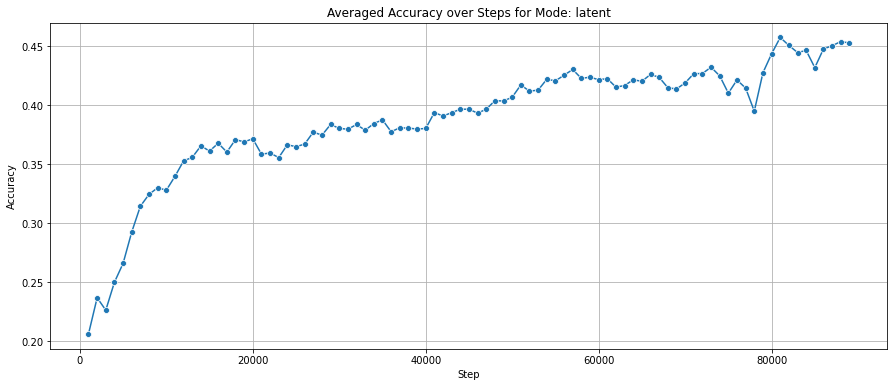

Maximum accuracy in reference mode: 0.3347 at step 86000


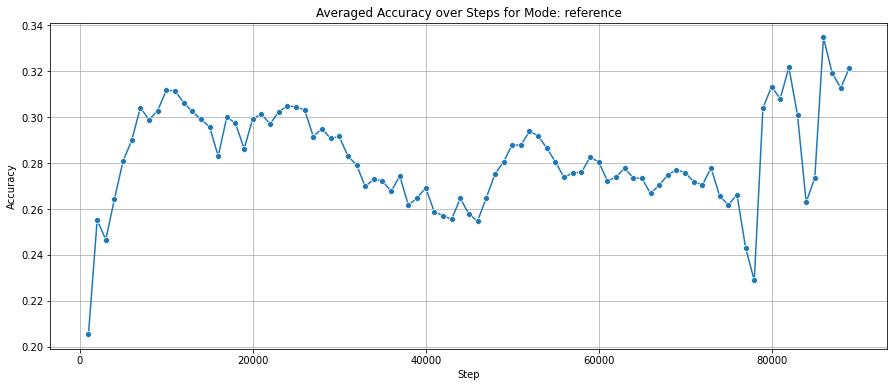

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_metric_averaged(data, mode, metric):
    # Filter the DataFrame based on mode
    filtered_data = data[data['mode'] == mode]
    
    # Group by step and calculate the mean of the metric
    averaged_data = filtered_data.groupby('step', as_index=False)[metric].mean()

    # Print the maximum value of the metric and its corresponding step
    max_value = averaged_data[metric].max()
    max_step = averaged_data[averaged_data[metric] == max_value]['step'].values[0]
    print(f'Maximum {metric} in {mode} mode: {max_value:.4f} at step {max_step}')
    
    # Plotting the line plot
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=averaged_data, x='step', y=metric, marker='o')
    plt.title(f"Averaged {metric.capitalize()} over Steps for Mode: {mode}")
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.show()



for mode in identification['mode'].unique():
    plot_metric_averaged(identification, mode, 'accuracy')